# Decision Tree Worksheet


In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
!pip install graphviz 
!apt-get install graphviz
import graphviz
import matplotlib.pyplot as plt

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.38.0-16ubuntu2).
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.


#### Load pima indians diabetes dataset below

In [27]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
labels = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
data = pd.read_csv(url, names=names)
data.head(10)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


#### create training and testing dataset with sklearn function: train_test_split

In [28]:
from sklearn.model_selection import train_test_split

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[labels], data['class'], test_size=0.25, random_state=0)

# further split X and y into training and validation sets
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

#### Create a model with sklearn's DecisionTreeClassifier and predict values on your test set

In [29]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=4,random_state=0)

# fit model
model.fit(X_train, y_train)

y_test_predict = model.predict(X_test)

#### Print the accuracy on the test data, play with the parameters and try to improve the accuracy
hint: there is an sklearn to calculate accuracy

In [30]:
from sklearn import metrics
print('Testing Accuracy:   {:01.3f}'.format(metrics.accuracy_score(y_test, y_test_predict)))

Testing Accuracy:   0.745


#### Use graphviz to view the decision tree graph
##### hint: want to look at a code example, see the Classification Evaluation notebook on github

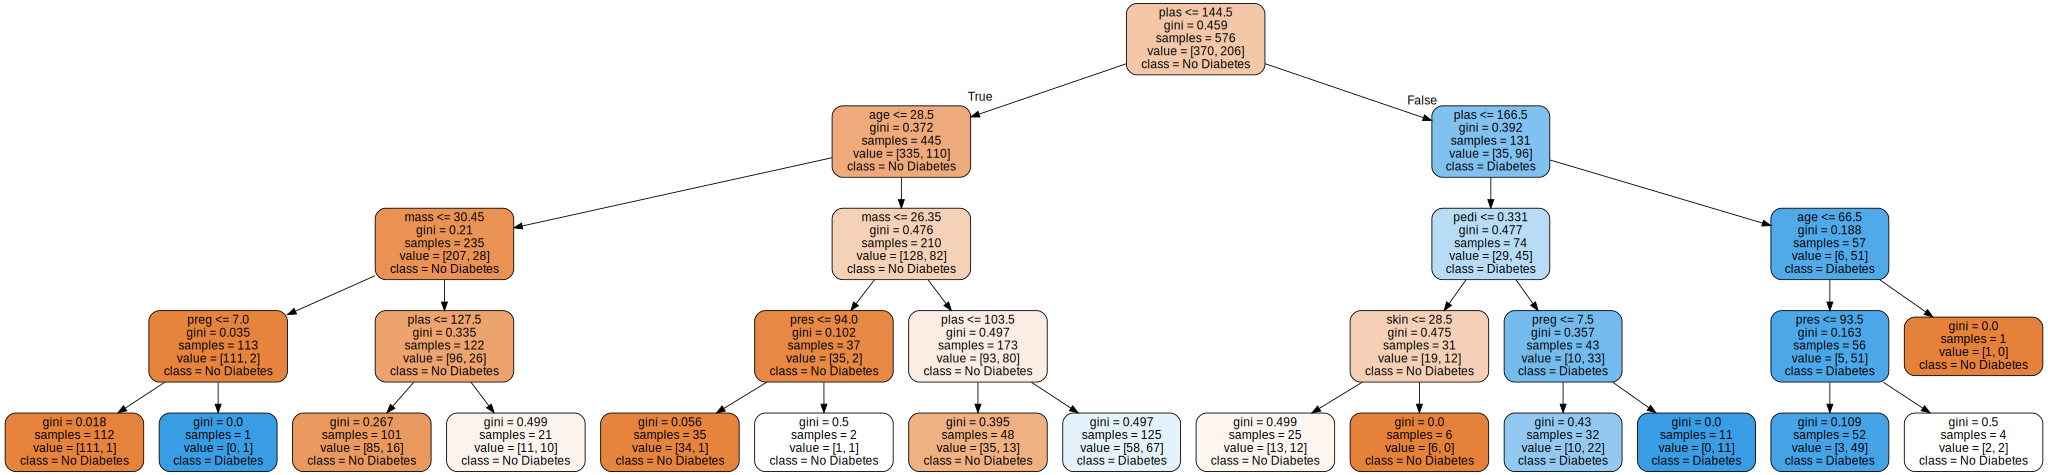

In [31]:
dot_data = tree.export_graphviz(model, out_file=None, 
                         feature_names=labels,  
                         class_names=['No Diabetes','Diabetes'],  
                         filled=True, rounded=True,
                         max_depth=4) 

graph = graphviz.Source(dot_data)  
graph

#### Use the graph above to answer the questions below

Question 1: If you add up the samples from the leaf nodes, how many samples are there?

total num of people

Question 2: What do you think X[n] represents in the nodes from the graph? <br>

the feature

Question 3: What is the root feature? Does it make sense as the root feature?

plas - yes, it is the highest correlated with the class

#### If you were to change the parameters to have a max_depth of 500 and min_samples_leaf of 1, what do you think the effect would be on the test accuracy? Training accuracy?

Your answer here <br>

#### Test your guesses, create a model with max_depth=500 and min_samples_leaf=1, and predict values for the training and test data <br>
you only need to predict part of the training data

In [32]:
model = DecisionTreeClassifier(max_depth=500, min_samples_leaf=1, random_state=0)

# fit model
model.fit(X_train, y_train)

y_test_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)

print('Training Accuracy:   {:01.3f}'.format(metrics.accuracy_score(y_train, y_train_predict)))
print('Testing Accuracy:   {:01.3f}'.format(metrics.accuracy_score(y_test, y_test_predict)))

Training Accuracy:   1.000
Testing Accuracy:   0.719


# Random Forest

#### Create a model with sklearn's RandomForestClassifier and predict values on your test set

In [33]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10, random_state=0)

# fit model
model.fit(X_train, y_train)

y_test_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)

print('Training Accuracy:   {:01.3f}'.format(metrics.accuracy_score(y_train, y_train_predict)))
print('Testing Accuracy:   {:01.3f}'.format(metrics.accuracy_score(y_test, y_test_predict)))

Training Accuracy:   0.986
Testing Accuracy:   0.771


#### Print the accuracy on the test data, play with the parameters and try to improve the accuracy<br>
how did the accuracy compare to the decision tree's accuracy?<br>



```
# This is formatted as code
```

#### Print the 3 most important features<br>
hint: sklearn has an attribute to help you find these 

In [34]:
sortedarr = sorted(list(model.feature_importances_))[::-1]
for i in range(3):
  index = list(model.feature_importances_).index(sortedarr[i])
  print(labels[index])
  

plas
age
mass




```
# This is formatted as code
```

#### Find the accuracy for random forests with 1 to 100 trees, counting by 5. Plot these accuracies

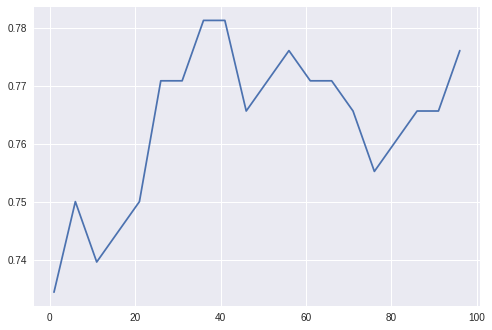

In [35]:
yval = []
xval = []
for i in range(1,100,5):
  model = RandomForestClassifier(n_estimators=i, random_state=0)
  model.fit(X_train, y_train)
  y_test_predict = model.predict(X_test)
  yval.append(metrics.accuracy_score(y_test, y_test_predict))
  xval.append(i)
plt.plot(xval,yval)

#### Plot the roc_curve using predict_proba a function for our random forest model, and metrics. roc_curve <br>
It might help to google these functions and look at sklearn's documentation

Probabilities:
 [0.97916667 0.02083333]

True Value:
 0


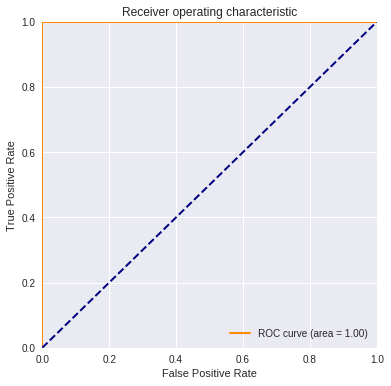

In [51]:
y_train_prob = model.predict_proba(X_train)

# Output predicted and true values for the first validation point
print('Probabilities:\n',y_train_prob[0])
print('\nTrue Value:\n',y_train.values[0])

# Calculate the FPR and TPR at varying thresholds (assume label 1 is the "postive" class)
#AUC, AUROC 
#1 = perfect; 0.5 = random
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_prob[:,1])

# Calculate the area under the ROC curve
roc_auc = metrics.auc(fpr, tpr)
# Plot the ROC curve
plt.figure(figsize=(6,6))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### To view the trees in the random_forest you can loop through your model's '.estimators_" attribute <br>
If you have time look at pictures of the trees

In [0]:
# your code here